# Scikit-Learn

- Python 대표 오픈소스 ML 라이브러리
    - 2007년 David Cournapeau가 Google Summer of Code 프로젝트로 시작
    - 2010년 INRIA 팀이 운영권을 맡아 v0.1 공개
    - 분기별 릴리즈. 2020년 8월 v0.23.2 공개
    - 각종 ML 알고리즘, 변수 변환, 메트릭 구현
    - Pandas, NumPy, Matplotlib 과 호환
    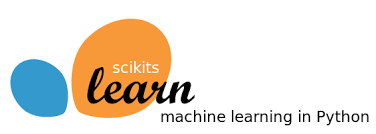
- 특징 : 가장 Python 스러운 API
- 설치 
    - conda install scikit-learn
    - pip install scikit-learn

[Scikit Learn 참고자료](https://jaaamj.tistory.com/16)



- Scikit-Learn ML Algorithm
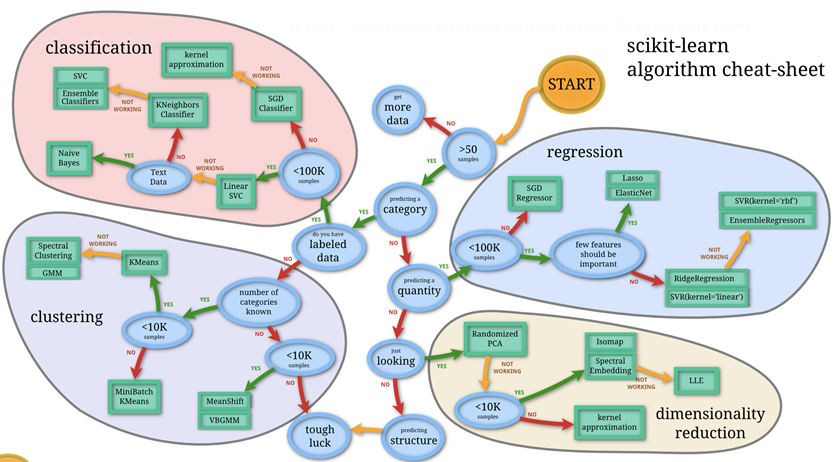
[Scikit Learn ML 알고리즘](https://scikit-learn.org/stable/tutorial/machine_learning_map)

## Scikit-learn 소개

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import sklearn 

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## 붓꽃 품종 예측

- 붓꽃 데이터 세트를 이용하여 붓꽃 품종을 분류(Classification)
    - 꽃잎의 길이와 너비
    - 꽃받침의 길이와 너비
    - 피쳐(Feature)를 기반으로 꽃의 품종 예측
    - 붓꽃 종류 : 'setosa' 'versicolor' 'virginica'
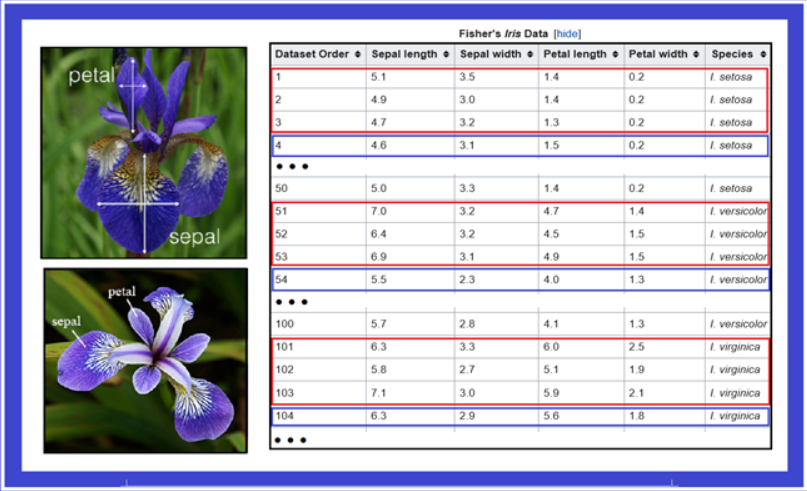



- 붓꽃 데이터 세트 기반의 ML 분류 예측 수행 프로세스

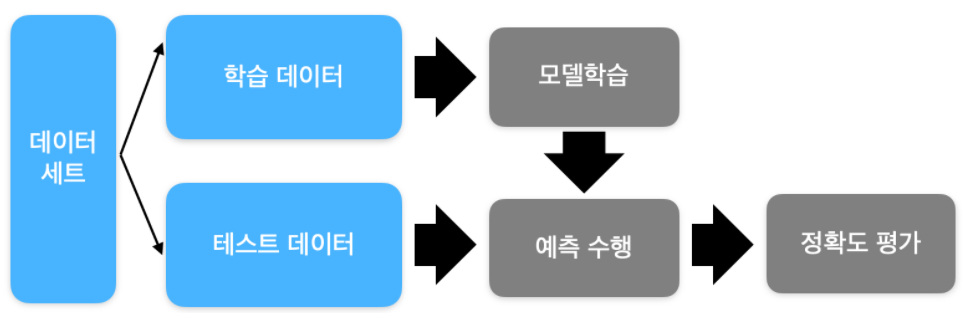
- 데이터 세트 분류 : 학습 데이터와 테스트 데이터로 분리한다.
- 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습 시킨다.
- 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류(붓꽃 종류)를 예측 한다.
- 평가 : 예측된 결과와 테스트 데이터의 실제 결과를 비교해 성능을 평가한다.

### 붓꽃 데이터 세트 로딩

In [4]:
iris = load_iris()

In [5]:
iris_data = iris.data

In [6]:
iris_label = iris.target
print('iris target값 : ', iris_label)
print('iris target명 : ', iris.target_names)

iris target값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 :  ['setosa' 'versicolor' 'virginica']


In [7]:
#붓꽃 데이터를 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###  train, test데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)

- DecisionTreeClassifier 객체 생성

In [9]:
df_clf = DecisionTreeClassifier(random_state=11)
df_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

### 학습 수행

In [10]:
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

### 학습이 완료된 객체에서 테스트 데이터 세트로 예측 수행

In [11]:
pred = df_clf.predict(X_test)

### 예측 정확도

In [12]:
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.933333


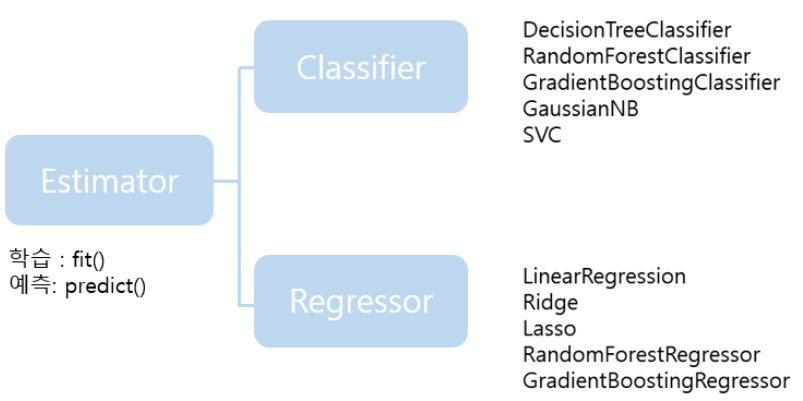

## 학습/테스트 데이터 세트 분리 : train_test_split()

- Parameter
    - test_size:전체 데이터에서 Test데이터 세트 크기를 얼마로 샘플링할 것 인가 결정, Default 0.25, 즉 25%

    - train_size : 전체 데이터에서 Train데이터 세트 크기를 얼마로 샘플링할 것 인가 결정, train_size 잘 사용되지 않음

    - Shuffle : 데이터를 분리하기 전에 데이터를 섞을지 결정, Default : True, 좀더 효율적인 데이터 세트를 만드는데 활용

    - random_state : 동일한 학습/테스트용 데이터 세트를 생성하기 위해서 주어지는 난수 값

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


- train_test_split()를 이용 데이터 세트를 전체의 30%, 학습 데이터 세트를 70%로 분리, random_state=121로 변경

In [47]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [54]:
dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                         iris_data.target, test_size=0.3, random_state=121)

In [15]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


## 교차 검증

- N-fold Cross-Validation
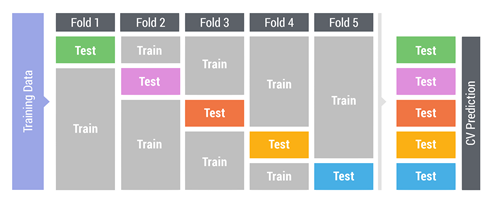

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])


붓꽃 데이터 세트 크기: 150


In [17]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9
